In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
from PIL import Image
import torch
from google.colab import files

In [ ]:
def initialize_model(device):
    processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
    model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b",
                                                          torch_dtype=torch.float16,
                                                          device_map='auto').to(device)
    return processor, model

def read_and_display_image(image_path):
    image = Image.open(image_path)
    display(image)
    return image

def generate_caption(image, processor, model):
    inputs = processor(image, return_tensors="pt").to(device)
    generated_ids = model.generate(**inputs, max_new_tokens = 50)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return caption

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
blip2_processor, blip2_model = initialize_model(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
uploaded = files.upload()

Saving WhatsApp Image 2025-03-18 at 11.31.46_aa4854e0.jpg to WhatsApp Image 2025-03-18 at 11.31.46_aa4854e0.jpg


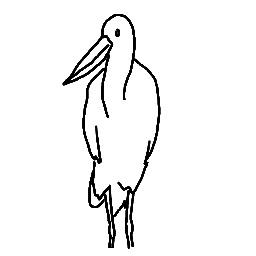

In [ ]:
image_name = list(uploaded.keys())[0]
image = read_and_display_image(image_name)

In [ ]:
generated_caption = generate_caption(image, blip2_processor, blip2_model)
print(generated_caption)

a drawing of a bird standing on a white background

